# **Forecasting Heart Disease Risk**

## **Business Understanding**

### **Problem Statement**
To develop models for an insurance company using the **Heart Disease dataset** from the UCI Machine Learning Repository. The goal is to predict the likelihood of a person developing heart disease, which would help the insurance company estimate health riskd and adjust premiums accordingly.

## **Data Understanding**
The dataset contains various features related to patients' health and demographic information. We will explore the dataset to understand its structure and relationships between variables.

### **Data Dictionary**
The dataset contains 14 key attributes that are either numerical or categorical. These attributes are:

1. **age**: Age of the patient (numeric)
2. **sex**: Gender of the patient (1 = male, 0 = female)
3. **cp**: Chest pain type (categorical: 1-4)
4. **trestbps**: Resting blood pressure (numeric)
5. **chol**: Serum cholesterol (numeric)
6. **fbs**: Fasting blood sugar (1 = true, 0 = false)
7. **restecg**: Resting electrocardiographic results (categorical)
8. **thalach**: Maximum heart rate achieved (numeric)
9. **exang**: Exercise-induced angina (1 = yes, 0 = no)
10. **oldpeak**: ST depression induced by exercise (numeric)
11. **slope**: The slope of the peak exercise ST segment (categorical)
12. **ca**: Number of major vessels (0-3, numeric)
13. **thal**: Thalassemia (categorical: 1 = normal, 2 = fixed defect, 3 = reversible defect)
14. **target**: Heart disease (1 = disease, 0 = no disease)


| Attribute            | Type        | Description                                   | Constraints/ Rules                         |
|:---------------------|:------------|:----------------------------------------------|:-------------------------------------------|
| Age                  | Numerical   | The age of the patient in years               | Range: 29-77 (based on dataset statistics) |
| Sex                  | Categorical | The gender of the patient                     | Values: 1 = Male, 0 = Female               |
| Chest Pain Type (cp) | Categorical | Type of chest pain experienced by the patient | Values: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic |
| Resting Blood Pressure (trestbps) | Numerical | Resting blood pressure of the patient, measured in mmHg | Range: Typically, between 94 and 200 mmHg |
| Serum Cholesterol (chol) | Numerical | Serum cholesterol level in mg/dl | Range: Typically, between 126 and 564 mg/dl |
| Fasting Blood Sugar (fbs) | Categorical | Fasting blood sugar level > 120 mg/dl | Values: 1 = True, 0 = False |
| Resting Electrocardiographic Results (restecg) | Categorical | Results of the patient’s resting electrocardiogram | Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Probable or definite left ventricular hypertrophy |
| Maximum Heart Rate Achieved (thalach) | Numerical | Maximum heart rate achieved during a stress test | Range: Typically, between 71 and 202 bpm |
| Exercise-Induced Angina (exang) | Categorical | Whether the patient experiences exercise-induced angina | Values: 1 = Yes, 0 = No |
| ST Depression (oldpeak) | Numerical | ST depression induced by exercise relative to rest (an ECG measure) | Range: 0.0 to 6.2 (higher values indicate more severe abnormalities) |
| Slope of Peak Exercise ST Segment (slope) | Categorical | Slope of the peak exercise ST segment | Values: 1 = Upsloping, 2 = Flat, 3 = Downsloping |
| Number of Major Vessels Colored by Fluoroscopy (ca) | Numerical | Number of major vessels colored by fluoroscopy | Range: 0-3 |
| Thalassemia (thal) | Categorical | Blood disorder variable related to thalassemia | Values: 3 = Normal, 6 = Fixed defect, 7 = Reversible defect |
| Target (target) | Categorical | Diagnosis of heart disease | Values: 0 = No heart disease, 1 = Presence of heart disease |

## **Data Preparation**

### **Data Loading and Preprocessing**

In [1]:
# Install necessary packages if not already installed
if (!requireNamespace("RCurl", quietly = TRUE)) {
  install.packages("RCurl")
}
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
  install.packages("randomForest")
}
if (!requireNamespace("rpart", quietly = TRUE)) {
  install.packages("rpart")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071")
}
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
if (!requireNamespace("GGally", quietly = TRUE)) {
  install.packages("GGally")
}

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
# Load the necessary libraries
library(RCurl)        # for data retrieval from url
library(dplyr)        # for tasks involving data manipulation
library(caret)        # for building and evaluating machine learning modules
library(randomForest) # for classification and regression tasks
library(e1071)        # for Support Vector Machine and Naive Bayes modeling
library(rpart)        # for creating decision trees for classification and regression
library(ggplot2)      # for training neural network models
library(corrplot)     # for displaying correlation matrices
library(GGally)
library(pROC)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Loading required package: ggplot2



Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:httr’:

    progress




randomForest 4.7-1.1



Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘randomForest’




The following object is masked from ‘package:ggplot2’:

    margin




The following object is masked from ‘package:dplyr’:

    combine




corrplot 0.92 loaded



Type 'citation("pROC")' for a citation.




Attaching package: ‘pROC’




The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [3]:
# Load the dataset
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Read the dataset into a dataframe
Heart.df <- read.csv(text = getURL(url), header = FALSE, na.strings = "?")

In [4]:
# Consider renaming the columns for clarity if they are not already named:
colnames(Heart.df) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target")

In [5]:
# Display the statistical summary of the dataframe
summary(Heart.df)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0  
 Mean   :54.44   Mean   :0.6799   Mean   :3.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0  
                                                                 
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
   

In [6]:
# Display the first few rows of the data
head(Heart.df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


### **Data Preprocessing**
We will preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.

In [7]:
# Convert binary variables to (0, 1)
Heart.df$target <- ifelse(Heart.df$target > 0, 1, 0)
Heart.df$sex <- ifelse(Heart.df$sex > 0, 1, 0)
Heart.df$fbs <- ifelse(Heart.df$fbs > 0, 1, 0)
Heart.df$exang <- ifelse(Heart.df$exang > 0, 1, 0)

In [8]:
# Handling missing values
# If missing values exist in 'ca' or 'thal', handle them using mean/mode imputation
Heart.df$ca[is.na(Heart.df$ca)] <- median(Heart.df$ca, na.rm = TRUE)
Heart.df$ca[Heart.df$ca == "?"] <- median(Heart.df$ca, na.rm = TRUE)
Heart.df$thal[is.na(Heart.df$thal)] <- median(Heart.df$thal, na.rm = TRUE)

In [9]:
# Check for missing values
sapply(Heart.df, function(x) sum(is.na(x)))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

In [10]:
# Check for duplicate entries in heart_disease
dupes <- Heart.df[duplicated(Heart.df) | duplicated(Heart.df, fromLast = TRUE), ]
# Print or inspect the duplicate entries
print(dupes)

 [1] age      sex      cp       trestbps chol     fbs      restecg  thalach 
 [9] exang    oldpeak  slope    ca       thal     target  
<0 rows> (or 0-length row.names)


In [11]:
# Convert categorical variables to factors
Heart.df$sex <- factor(Heart.df$sex, 
                       levels = c(0, 1), 
                       labels = c("Female", "Male"))
Heart.df$cp <- factor(Heart.df$cp, 
                      levels = c(1, 2, 3, 4), 
                      labels = c("Typical Angina", "Atypical Angina", 
                                 "Non-Angina", "Asymptomatic"))
Heart.df$fbs <- factor(Heart.df$fbs, 
                       levels = c(0, 1), 
                       labels = c("False", "True"))
Heart.df$restecg <- factor(Heart.df$restecg, 
                           levels = c(0, 1, 2), 
                           labels = c("Normal", "Wave-abnormality", "Probable"))
Heart.df$exang <- factor(Heart.df$exang, 
                         levels = c(0, 1), 
                         labels = c("No", "Yes"))
Heart.df$slope <- factor(Heart.df$slope, 
                         levels = c(1, 2, 3), 
                         labels = c("Upsloping", "Flat", "Downsloping"))
Heart.df$thal <- factor(Heart.df$thal, 
                        levels = c(3, 6, 7), 
                        labels = c("Normal", "Fixed Defect", "Reversible"))
Heart.df$target <- factor(Heart.df$target, 
                          levels = c(0, 1), 
                          labels = c("No", "Yes"))

### **Exploratory Data Analysis**

In [12]:
# Set the width and height of the plot area
options(repr.plot.width = 12, repr.plot.height = 6)

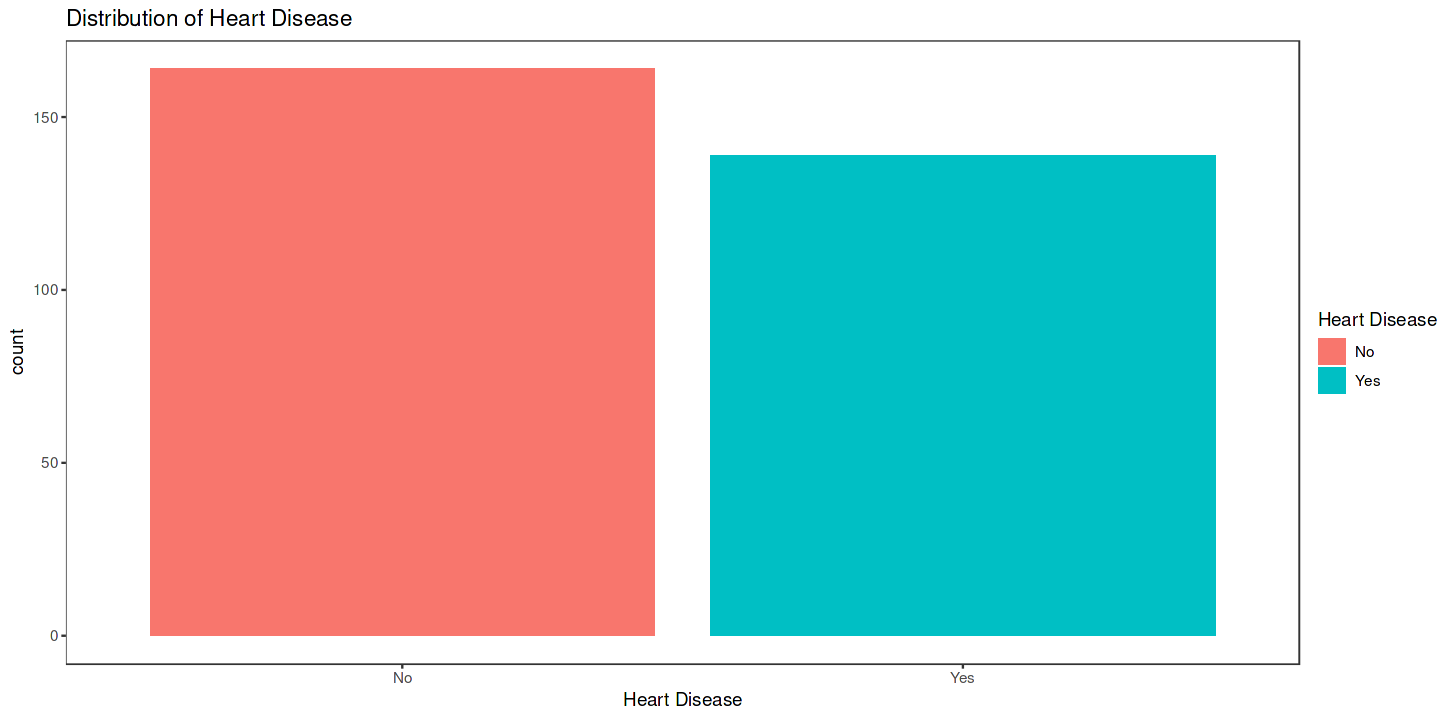

In [13]:
# Plot distribution of target variable (heart disease presence
ggplot(Heart.df, aes(x=target, fill=target))+
                     geom_bar() + theme_test() +
                     labs(title="Distribution of Heart Disease",
                         x = "Heart Disease", fill = "Heart Disease")

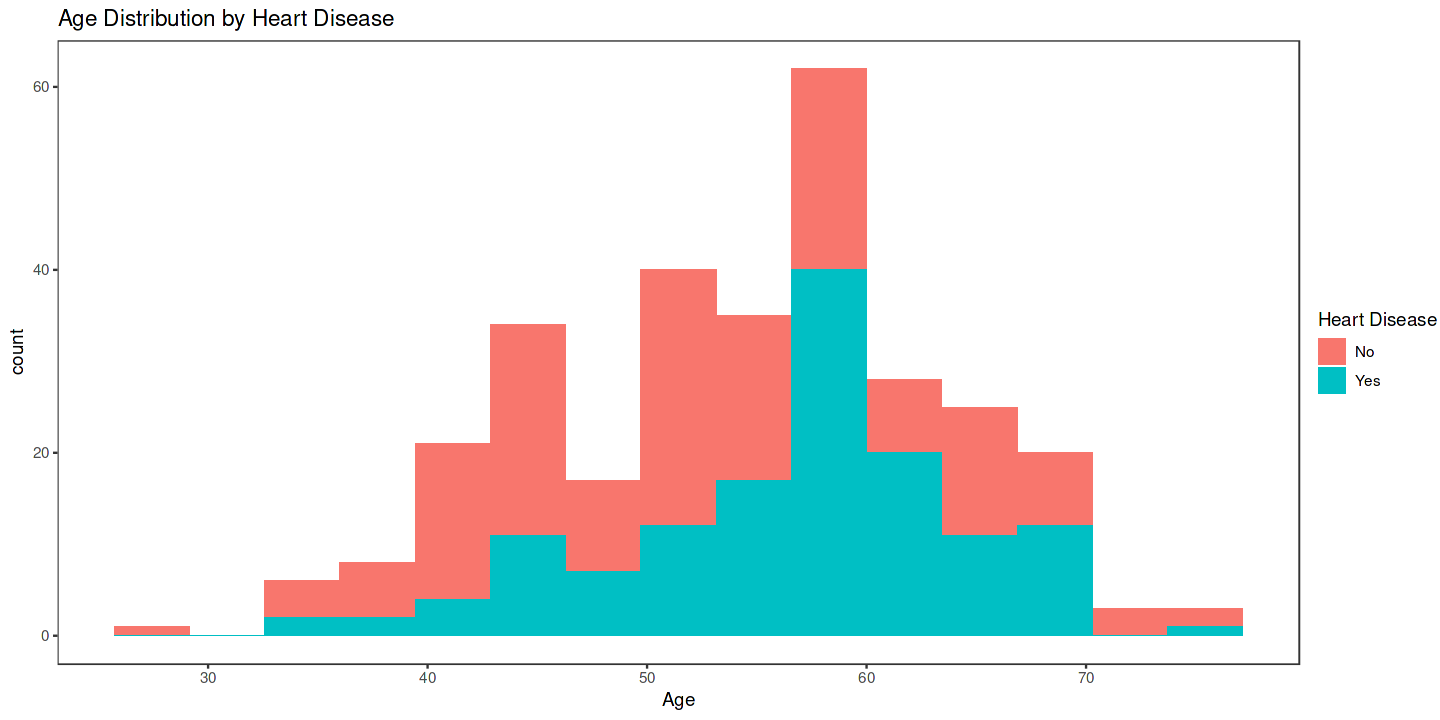

In [14]:
# Visualization: Age Distribution by Heart Disease
ggplot(Heart.df, aes(x = age, fill = as.factor(target))) + 
geom_histogram(bins = 15) + theme_test() +
labs(title = "Age Distribution by Heart Disease", 
     x = "Age", fill = "Heart Disease")

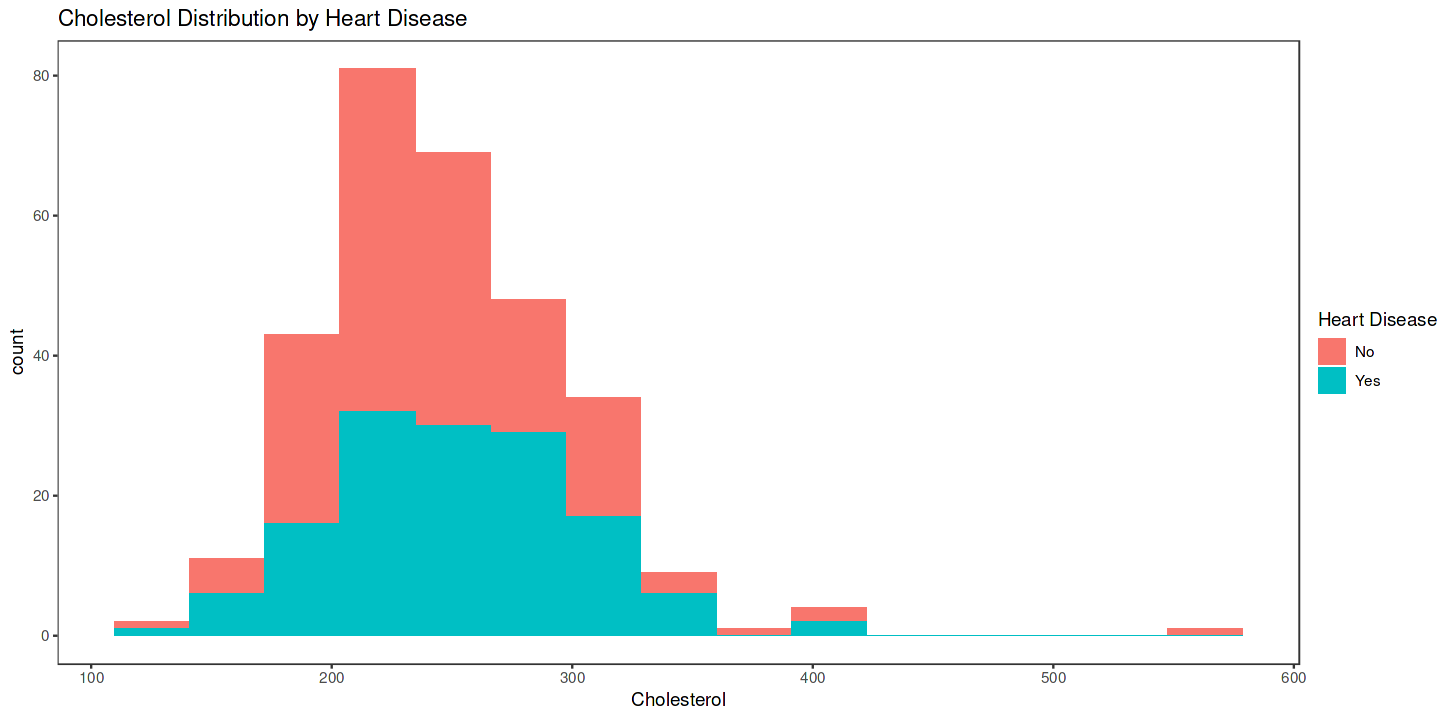

In [15]:
# Visualization: Cholesterol Distribution by Heart Disease
ggplot(Heart.df, aes(x = chol, fill = target)) + 
geom_histogram(bins = 15) + theme_test() +
labs(title = "Cholesterol Distribution by Heart Disease", 
     x = "Cholesterol", fill = "Heart Disease")

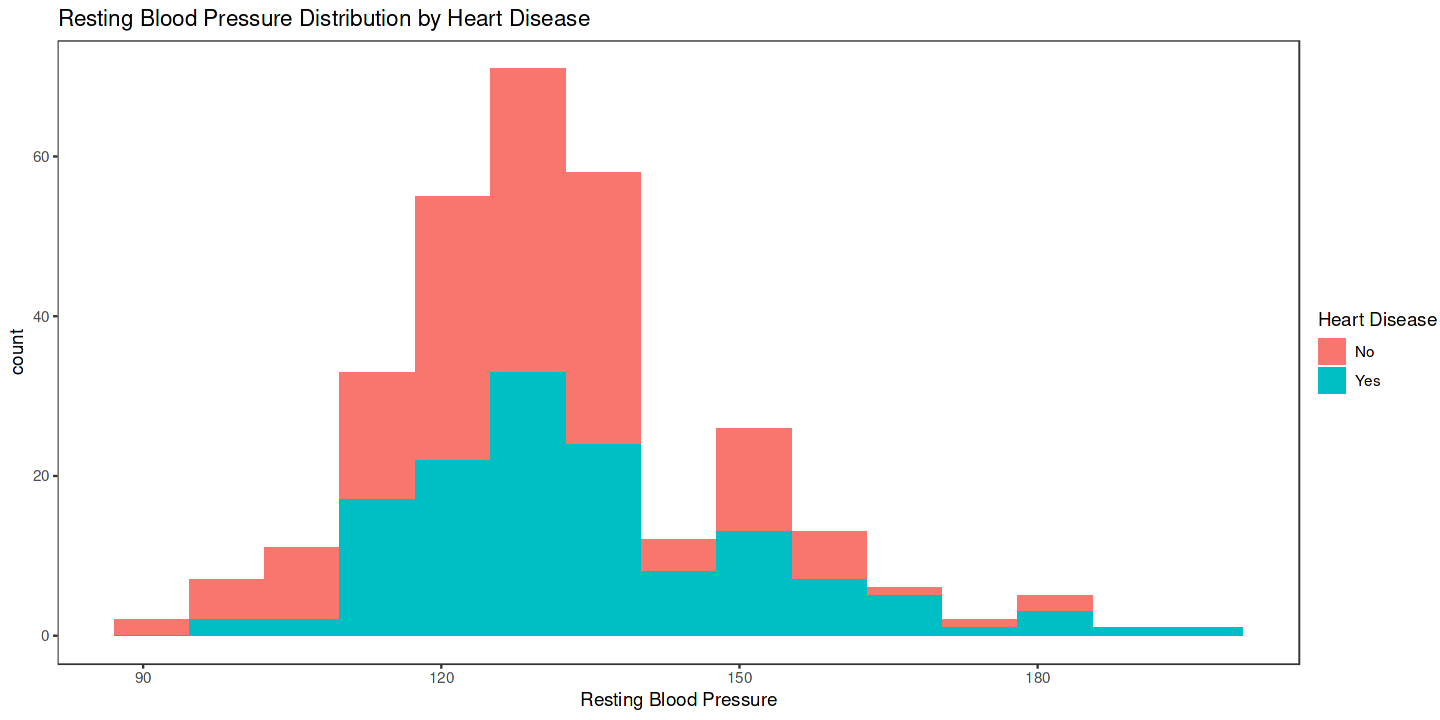

In [16]:
# Visualization: tresbps Distribution by Heart Disease
ggplot(Heart.df, aes(x = trestbps, fill = as.factor(target))) + 
geom_histogram(bins = 15) + theme_test() +
labs(title = "Resting Blood Pressure Distribution by Heart Disease", 
     x = "Resting Blood Pressure", fill = "Heart Disease")

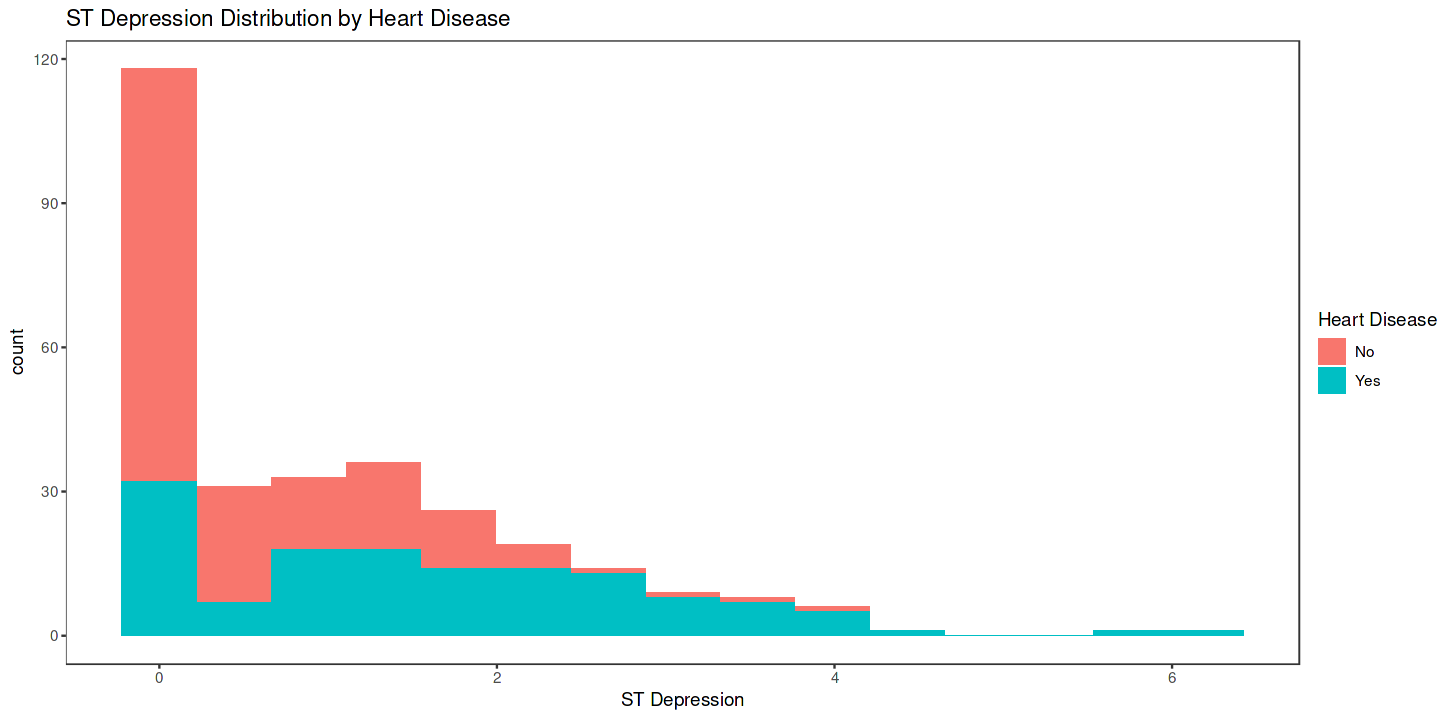

In [17]:
# Visualization: oldpeak Distribution by Heart Disease
ggplot(Heart.df, aes(x = oldpeak, fill = as.factor(target))) + 
geom_histogram(bins = 15) + theme_test() + 
labs(title = "ST Depression Distribution by Heart Disease", 
     x = "ST Depression", fill = "Heart Disease")

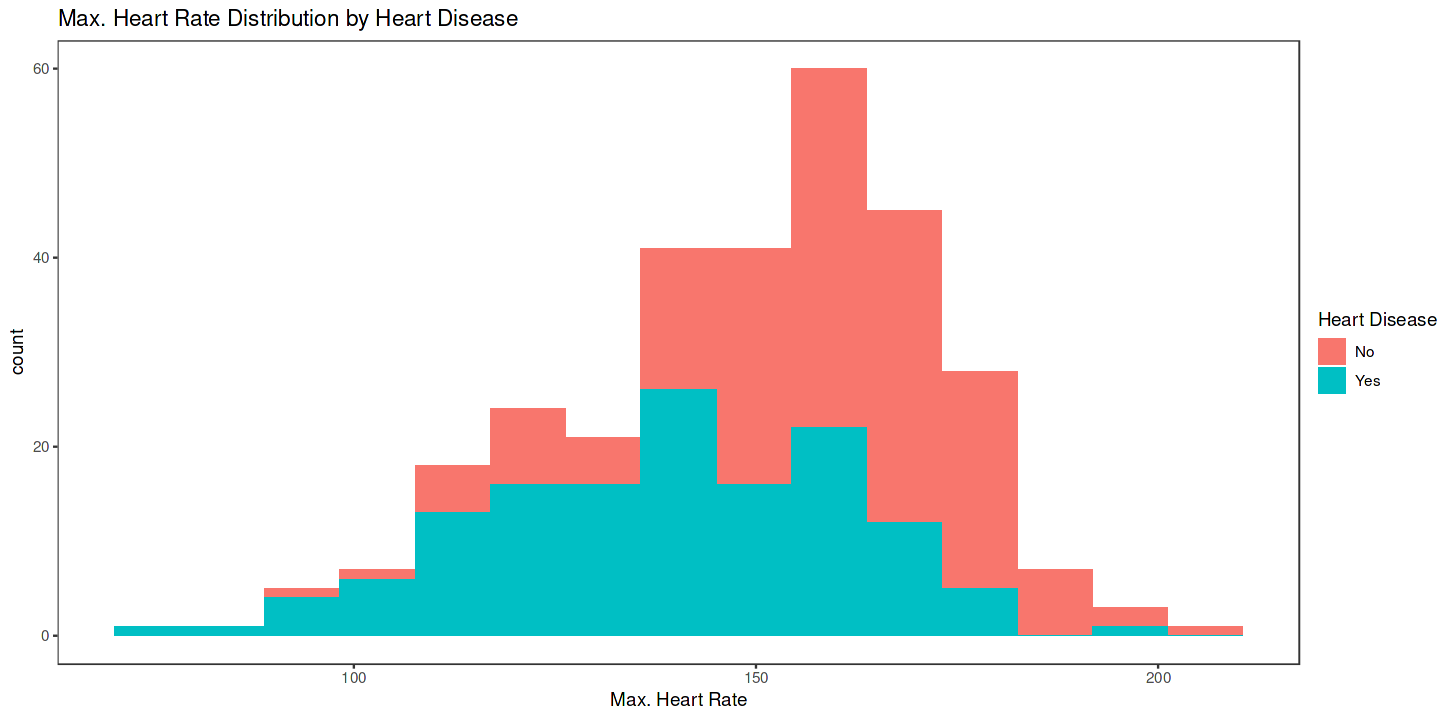

In [18]:
# Visualization: thalach Distribution by Heart Disease
ggplot(Heart.df, aes(x = thalach, fill = target)) + 
geom_histogram(bins = 15) + theme_test() + 
labs(title = "Max. Heart Rate Distribution by Heart Disease", 
     x = "Max. Heart Rate", fill = "Heart Disease")

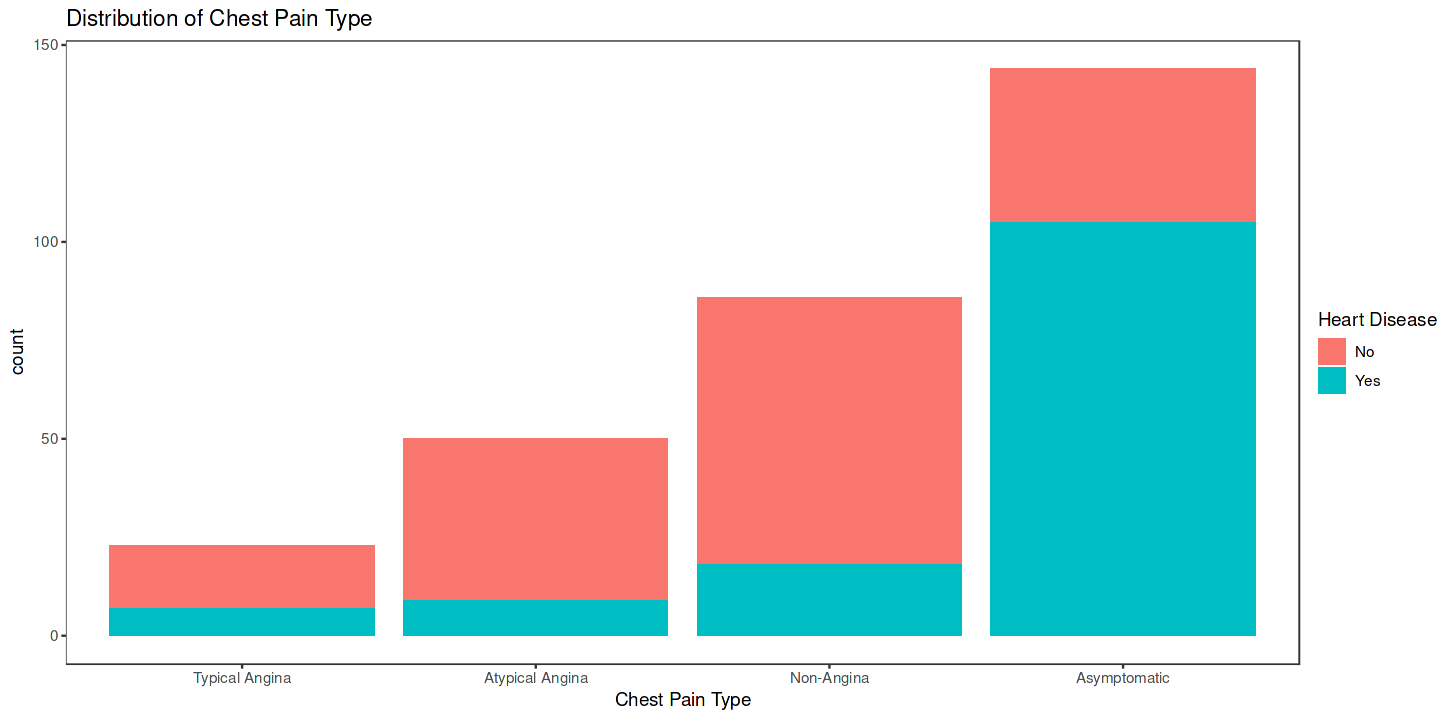

In [19]:
# Bar plot of chest pain type
ggplot(Heart.df, aes(x = cp, fill = target)) + 
theme_test() + geom_bar() + 
labs(title = "Distribution of Chest Pain Type", 
     x = "Chest Pain Type", fill = "Heart Disease")

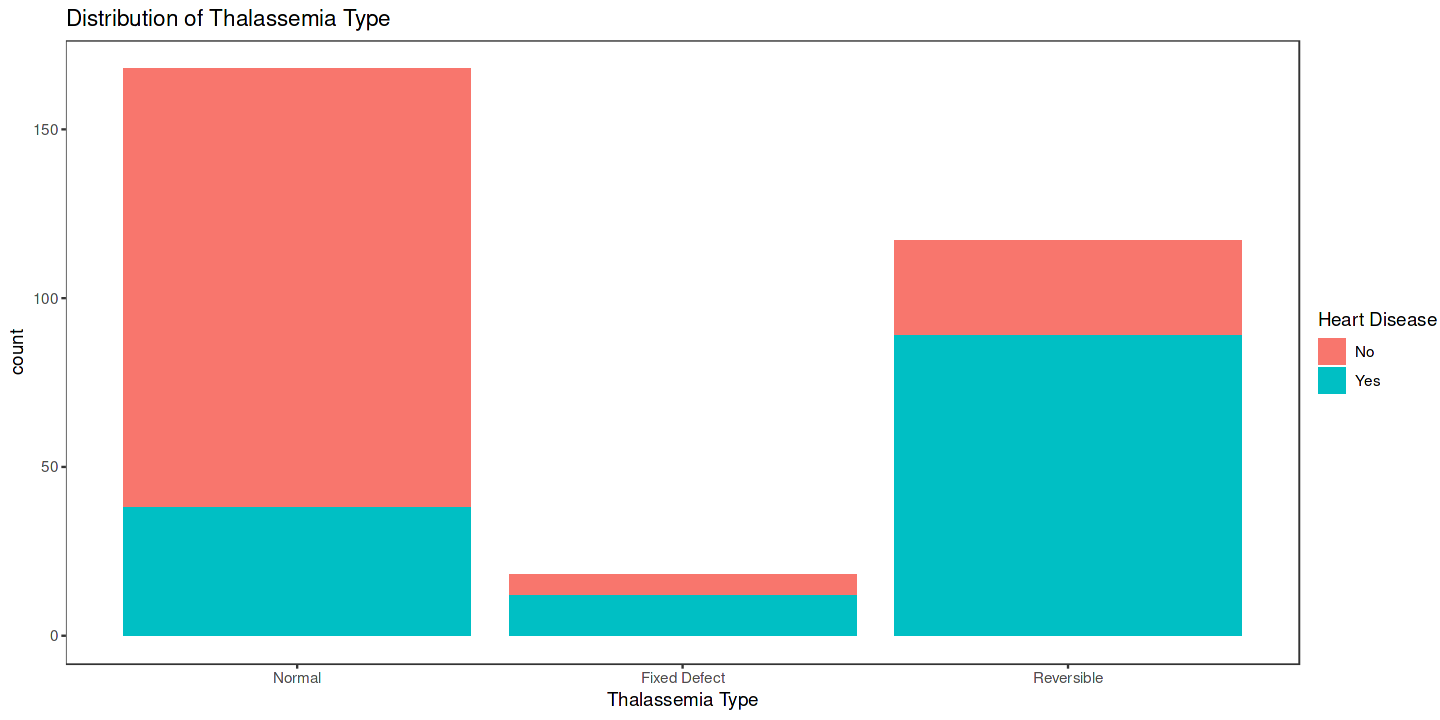

In [20]:
# Bar plot of thalassemia type
ggplot(Heart.df, aes(x = thal, fill = target)) + 
theme_test() + geom_bar() + 
labs(title = "Distribution of Thalassemia Type", 
     x = "Thalassemia Type", fill = "Heart Disease")

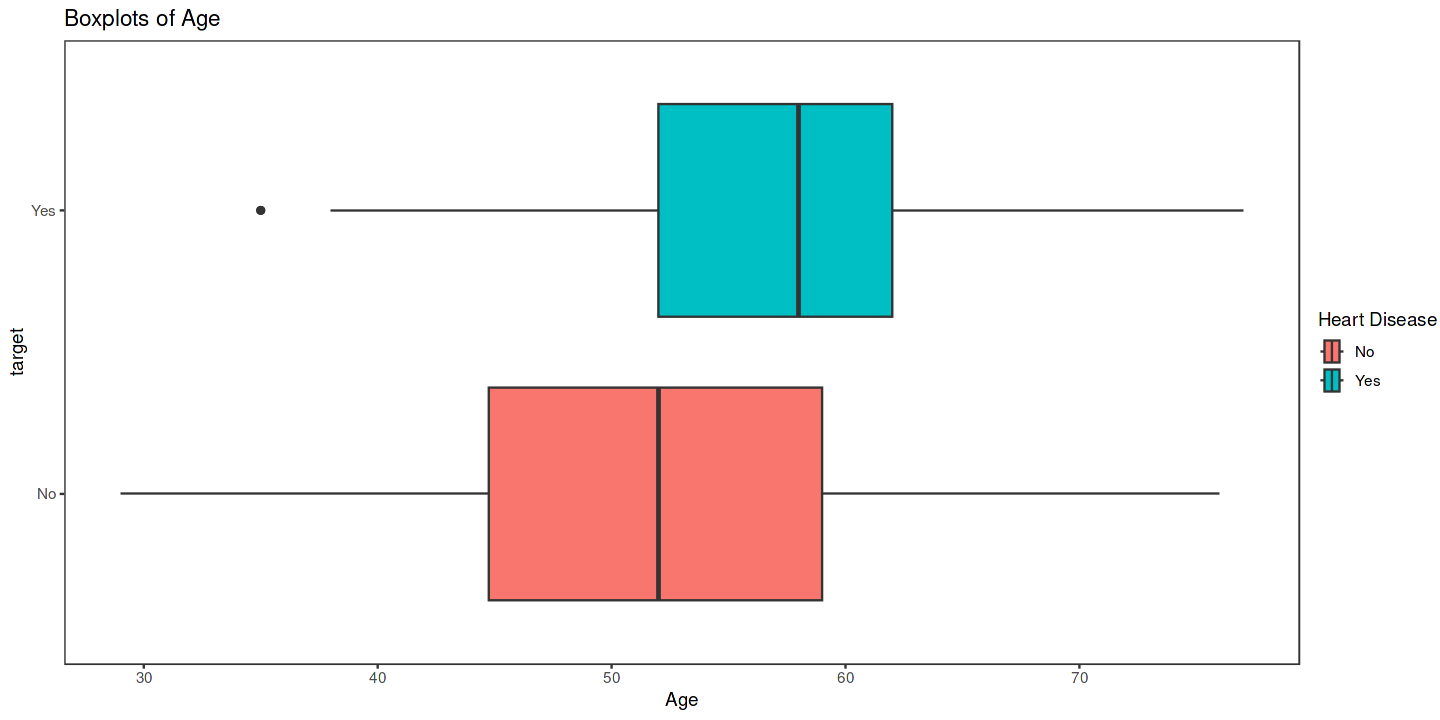

In [21]:
# Create side-by-side age box plots for 0 target and 1 target
ggplot(Heart.df, aes(x = age, y = target, fill = target)) +
geom_boxplot() + theme_test() +
labs(title = "Boxplots of Age", x = "Age", fill = "Heart Disease")

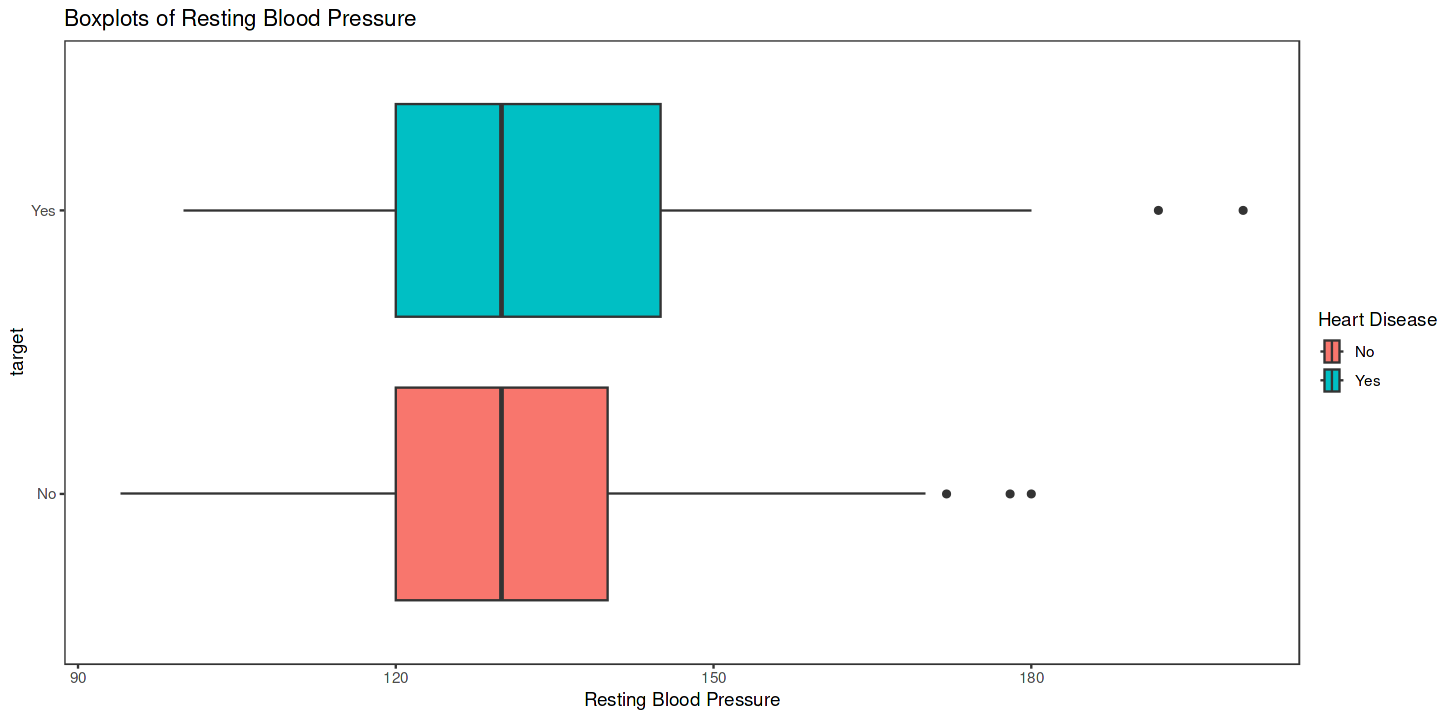

In [22]:
# Create side-by-side trestbps box plots for 0 target and 1 target
ggplot(Heart.df, aes(x = trestbps, y = target, fill = target)) +
geom_boxplot()  + theme_test() +
labs(title = "Boxplots of Resting Blood Pressure", 
     x = "Resting Blood Pressure", fill = "Heart Disease")

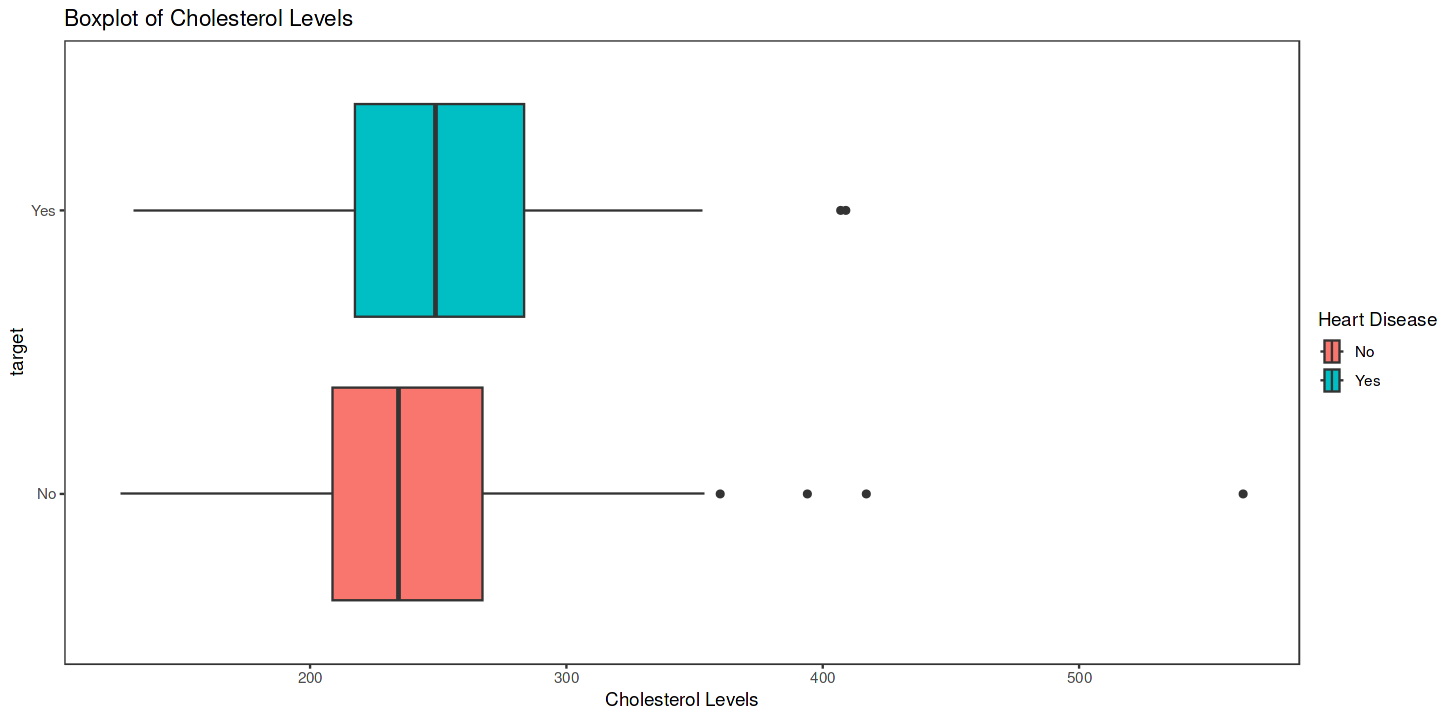

In [23]:
# Create side-by-side chol box plots for 0 target and 1 target
ggplot(Heart.df, aes(x = chol, y = target, fill = target)) +
geom_boxplot()  + theme_test() +
labs(title = "Boxplot of Cholesterol Levels",
    x = "Cholesterol Levels", fill = "Heart Disease")

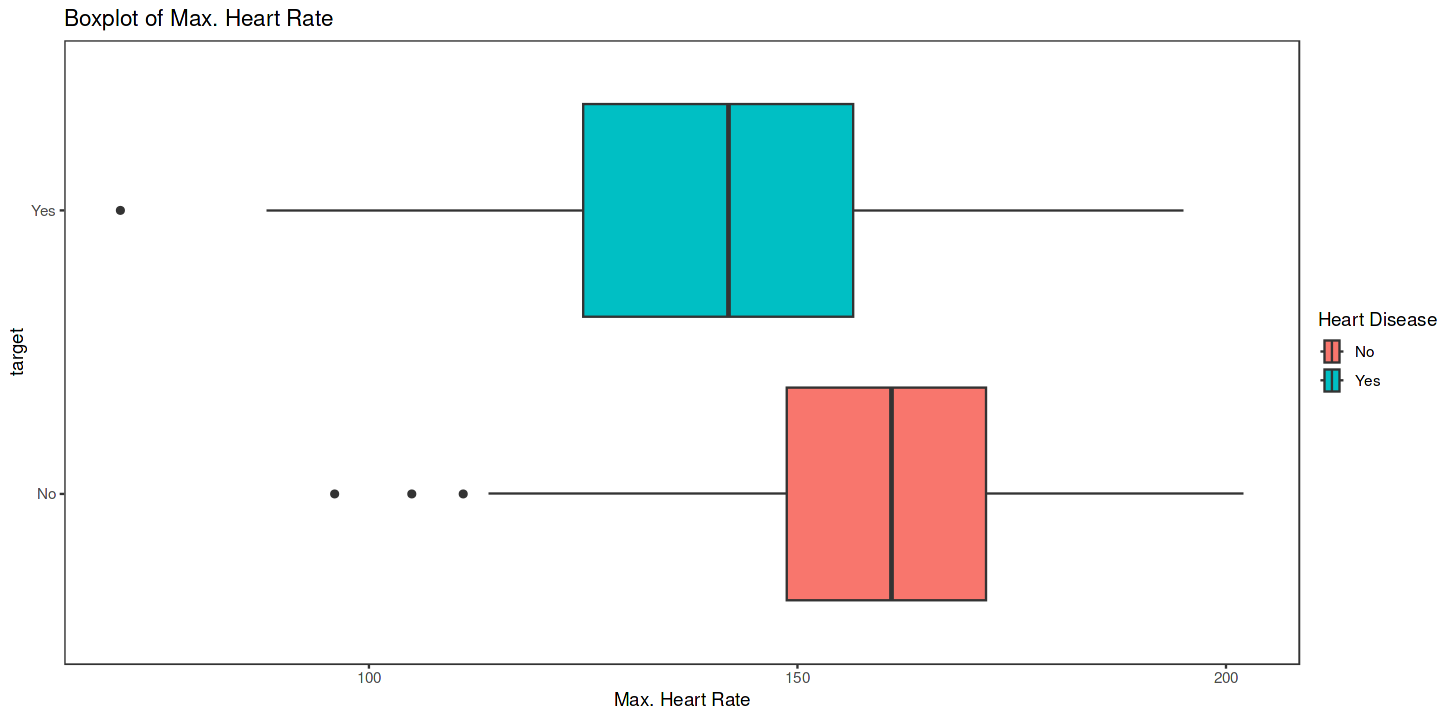

In [24]:
# Create side-by-side thalach box plots for 0 target and 1 target
ggplot(Heart.df, aes(x = thalach, y = target, fill = target)) +
geom_boxplot() + theme_test() +
labs(title = "Boxplot of Max. Heart Rate",
    x = "Max. Heart Rate", fill = "Heart Disease")

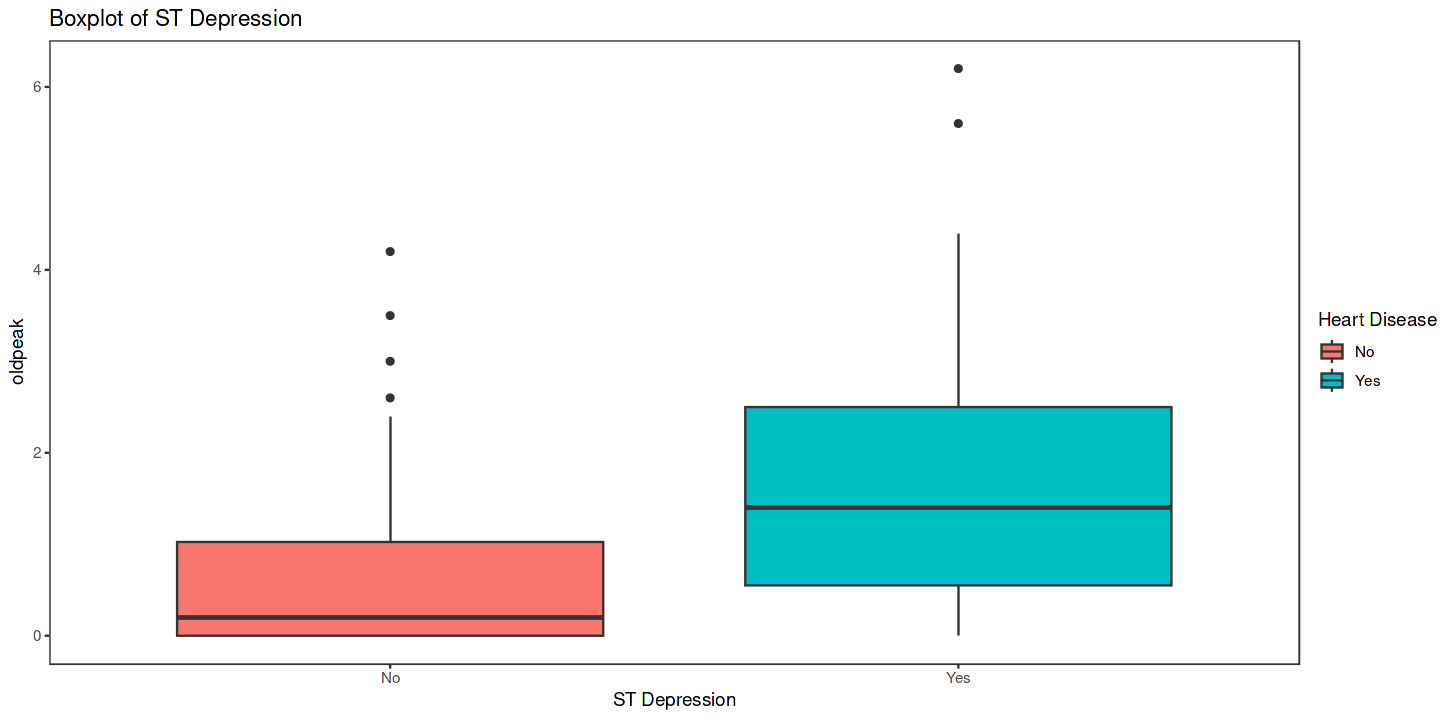

In [25]:
# Create side-by-side oldpeak box plots for 0 target and 1 target
ggplot(Heart.df, aes(y = oldpeak, x = target, fill = target)) +
geom_boxplot() + theme_test() +
labs(title = "Boxplot of ST Depression",
    x = "ST Depression", fill = "Heart Disease")

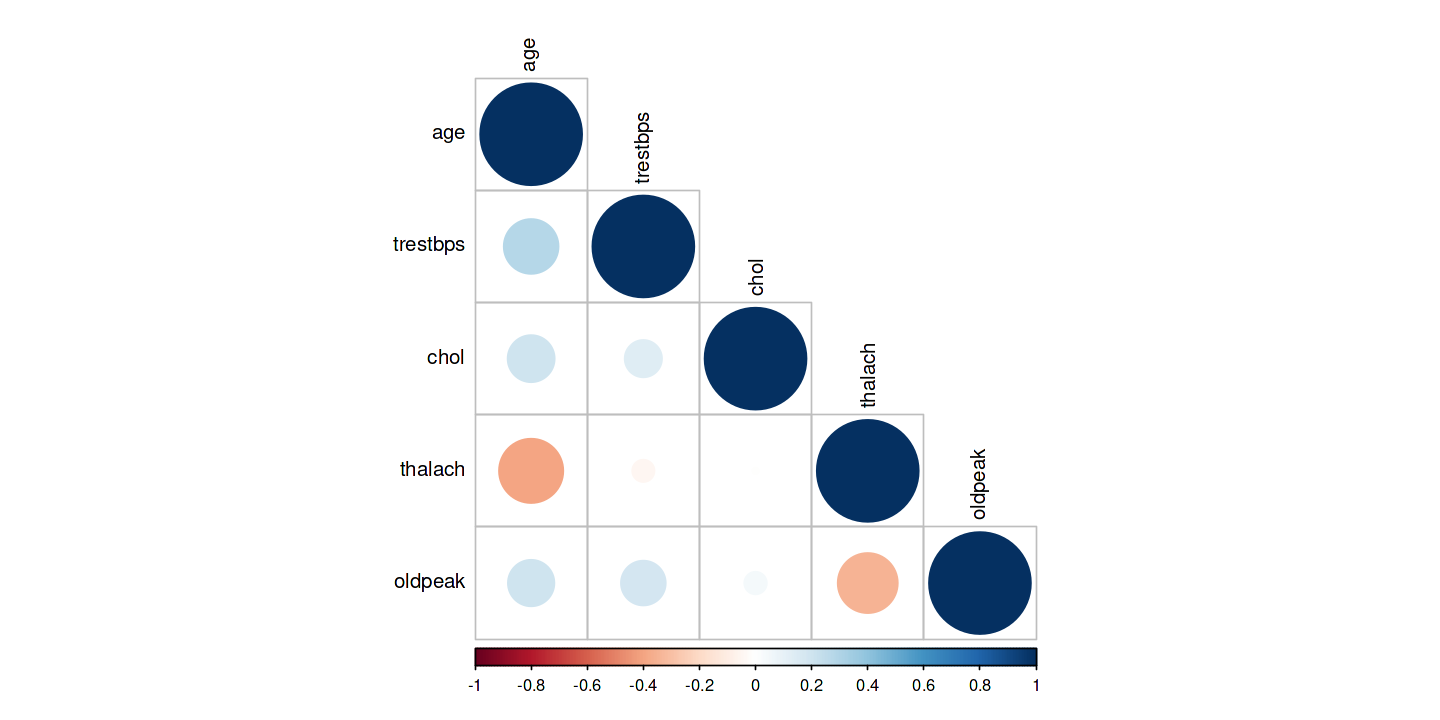

In [26]:
# Correlation matrix for continuous variables
# Selecting only continuous variables
continuous_vars <- c("age", "trestbps", "chol", "thalach", "oldpeak")
continuous_data <- Heart.df %>% select(all_of(continuous_vars))

# Calculating correlation matrix
correlation_matrix <- cor(continuous_data)

# Plotting the correlation matrix
corrplot(correlation_matrix, method = "circle", type = "lower", tl.col = "black")

### **Handle Outliers**
Remove outliers from continuous variables.

In [27]:
# Apply multiple filtering conditions to remove outliers
Heart.df <- Heart.df[Heart.df$age > 40 & 
                     Heart.df$trestbps < 170 & 
                     Heart.df$chol < 340 & 
                     Heart.df$thalach > 115 &
                     Heart.df$oldpeak < 2.4, ]

### **Spliting the Dataset**
Split the dataset into training set and testing set. I will use 70% of the data for training and 30% for testing.

In [28]:
# Set random seed for reproducibility
set.seed(123)

# Split dataset into training (70%) and testing (30%)
indx <- createDataPartition(Heart.df$target, p =0.7, list = FALSE)
train_data <- Heart.df[indx, ]
test_data <- Heart.df[-indx, ]

### **Scale Numerical Variables**
For models like SVM and KNN, we need to scale the numeric features.

In [29]:
# Scaling numerical features (excluding the target and categorical variables)
numeric_columns <- c("age", "trestbps", "chol", "thalach", "oldpeak")
train_data[numeric_columns] <- scale(train_data[numeric_columns])
test_data[numeric_columns] <- scale(test_data[numeric_columns])

## **Model Development**

### **1. Logistic Regression Model**
Logistic regression is suitable for predicting a binary outcome (presence or absence of heart disease)

In [30]:
# Train logistic regression model
log_model <- glm(target ~., data = train_data, family = binomial)

In [31]:
# Predict the logistic regression model using the testing data
log_pred <- predict(log_model, test_data, type = "response")
log_pred_class <- ifelse(log_pred > 0.5, "Yes", "No")

### **2. Random Forest Model**

In [32]:
# Train the Random Forest Model with Hyperparameter tuning
rf_model <- train(target ~ ., data = train_data, method = "rf", 
                  trControl = trainControl(method = "cv", number = 10),
                  tuneGrid = expand.grid(mtry = c(2, 3, 4, 5)))

In [33]:
# Predict on random forest model using the testing data
rf_pred <- predict(rf_model, test_data)

### **3. Support Vector Machine (SVM) Model**

In [34]:
# Train the Support Vector Machine Model
svm_model <- svm(target ~ ., data = train_data, kernel = "radial")

In [35]:
# Predict the SVM model using the testing data
svm_pred <- predict(svm_model, test_data)

### **4. Decision Tree Model**

In [36]:
# Train the Decision Tree Model
dt_model <- rpart(target ~ ., data = train_data, method = "class")

In [37]:
# Predict the decision tree model using the testing data
dt_pred <- predict(dt_model, test_data, type = "class")

### **5. K-Nearest Neighbors (KNN) Model**

In [38]:
# Train the k-Nearest Neighbors (KNN) Model
knn_model <- train(target ~ ., data = train_data, 
                   method = "knn",
                   trControl = trainControl(method = "cv", number = 5))

In [39]:
# Predict the KNN model using the testing data
knn_pred <- predict(knn_model, test_data)

### **6. Naive Bayesian Model**

In [40]:
# Train the Naive Bayes Model
nb_model <- naiveBayes(target ~ ., data = train_data)

In [41]:
# Make predictions on the test set
nb_pred <- predict(nb_model, test_data)

## **Model Evaluation and Comparison**
To compare the models, evaluate their performance using accuracy, precision, recall, F1-score, ROC-AUC, and confussion matrix.

In [42]:
# Ensure the target variable is a factor with the correct levels
test_data$target <- factor(test_data$target, levels = c("No", "Yes"))

### **1. Logistic Regression Model**

In [43]:
# Evaluate the logistic regression model using the testing data
confusionMatrix(as.factor(log_pred_class), as.factor(test_data$target))

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  36   9
       Yes  3  11
                                          
               Accuracy : 0.7966          
                 95% CI : (0.6717, 0.8902)
    No Information Rate : 0.661           
    P-Value [Acc > NIR] : 0.01668         
                                          
                  Kappa : 0.5104          
                                          
 Mcnemar's Test P-Value : 0.14891         
                                          
            Sensitivity : 0.9231          
            Specificity : 0.5500          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.7857          
             Prevalence : 0.6610          
         Detection Rate : 0.6102          
   Detection Prevalence : 0.7627          
      Balanced Accuracy : 0.7365          
                                          
       'Positive' Class : No              
                                 

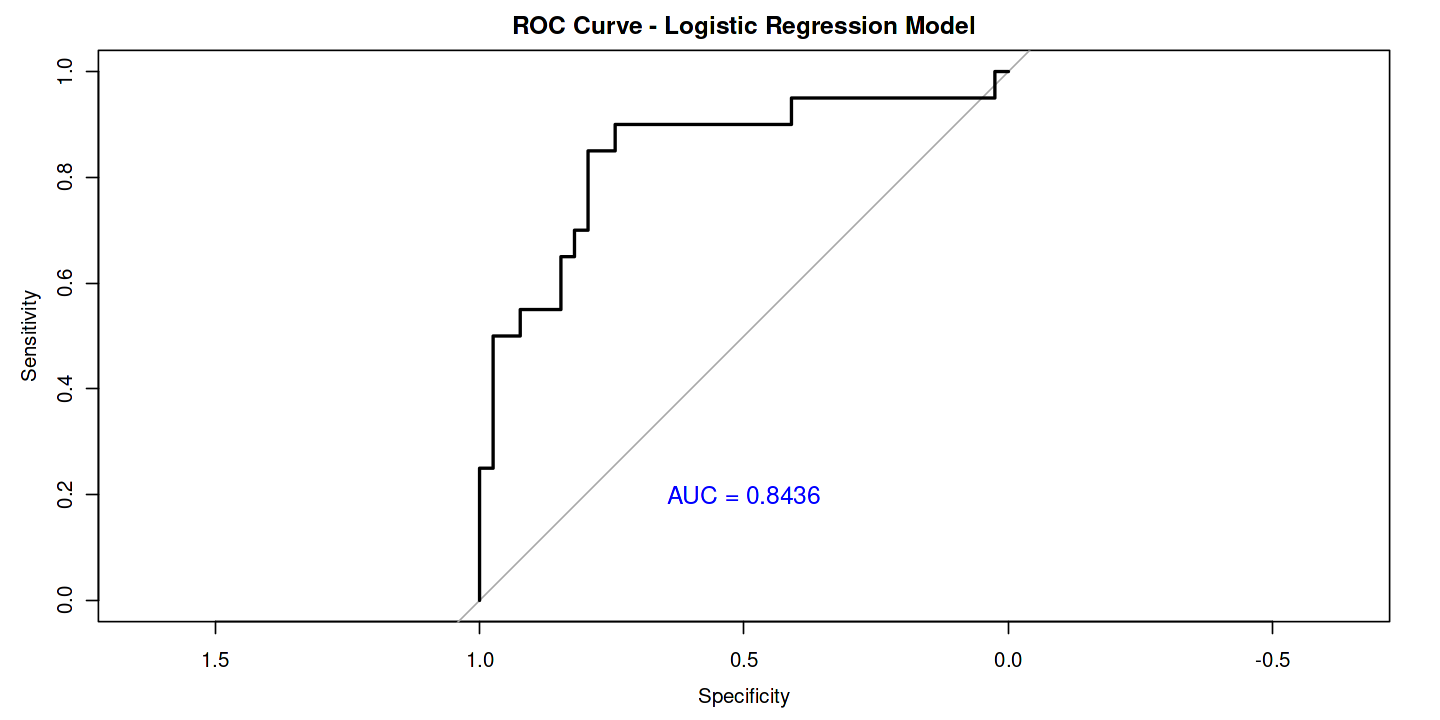

In [44]:
# ROC for logistic regression model
# Generate the ROC curve
roc_log <- roc(test_data$target, log_pred, levels = c("No", "Yes"), direction = "<")

# Plot the ROC curve
plot(roc_log, main = "ROC Curve - Logistic Regression Model")

# Calculate the AUC
auc_value <- auc(roc_log)

# Add the AUC value to the plot
text(x = 0.5, y = 0.2, labels = paste("AUC =", round(auc_value, 4)), col = "blue", cex = 1.2)

In [45]:
# Calculate and Display Precision, Recall, F1-Score, and AUC
precision <- posPredValue(as.factor(log_pred_class), as.factor(test_data$target))
recall <- sensitivity(as.factor(log_pred_class), as.factor(test_data$target))
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Display Precision, Recall, F1-Score, and AUC")
cat("\nPrecision \t=", round(precision, 4))
cat("\nRecall \t\t=", round(recall, 4))
cat("\nF1-Score \t=", round(f1_score, 4))
cat("\nAUC \t\t=", round(auc_value, 4))

Display Precision, Recall, F1-Score, and AUC


Precision 	= 0.8


Recall 		= 0.9231


F1-Score 	= 0.8571


AUC 		= 0.8436

### **2. Random Forest Model**

In [46]:
# Evaluate the random forest model using the testing data
confusionMatrix(rf_pred, as.factor(test_data$target))

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  35   9
       Yes  4  11
                                          
               Accuracy : 0.7797          
                 95% CI : (0.6527, 0.8771)
    No Information Rate : 0.661           
    P-Value [Acc > NIR] : 0.03363         
                                          
                  Kappa : 0.4765          
                                          
 Mcnemar's Test P-Value : 0.26726         
                                          
            Sensitivity : 0.8974          
            Specificity : 0.5500          
         Pos Pred Value : 0.7955          
         Neg Pred Value : 0.7333          
             Prevalence : 0.6610          
         Detection Rate : 0.5932          
   Detection Prevalence : 0.7458          
      Balanced Accuracy : 0.7237          
                                          
       'Positive' Class : No              
                                 

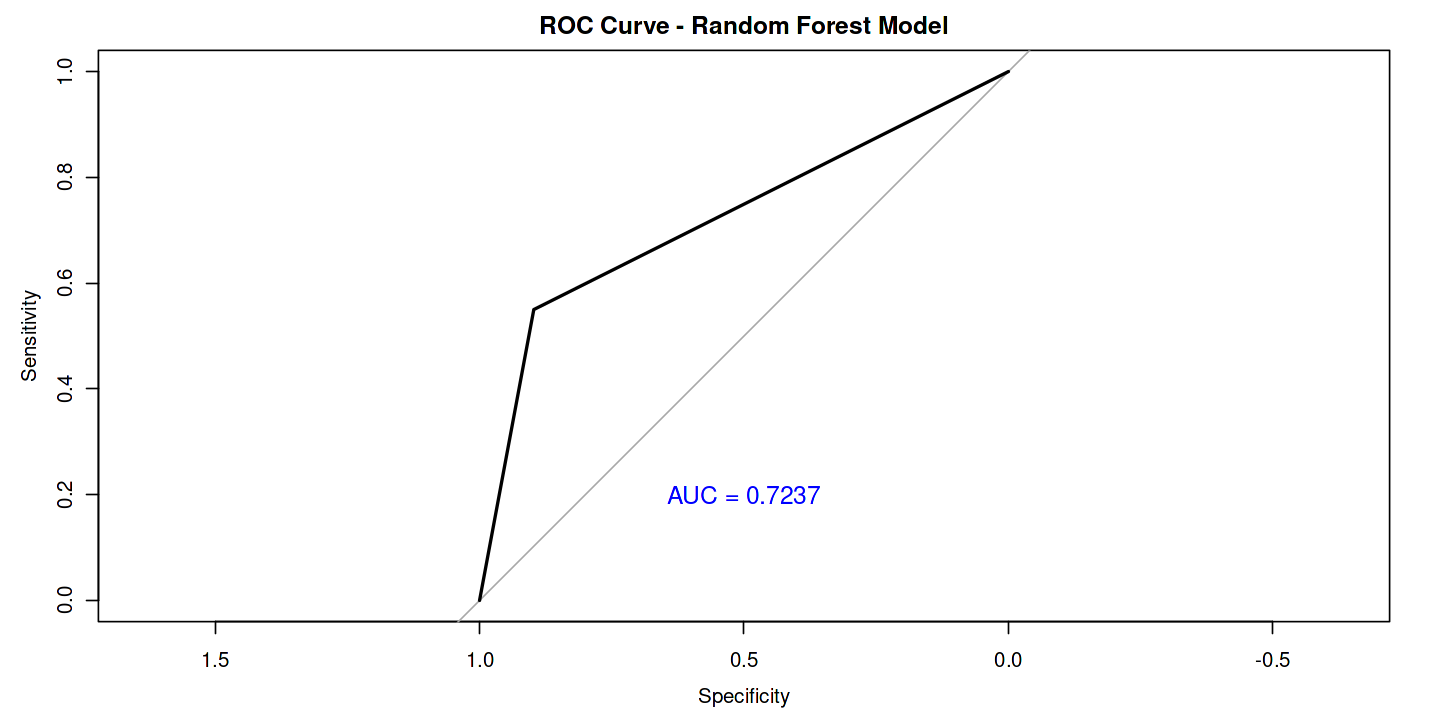

In [47]:
# ROC for Random Forest Model
# Generate the ROC curve
roc_rf <- roc(test_data$target, as.numeric(rf_pred), levels = c("No", "Yes"), direction = "<")

# Plot the ROC curve
plot(roc_rf, main = "ROC Curve - Random Forest Model")

# Calculate the AUC
auc_value <- auc(roc_rf)

# Add the AUC value to the plot
text(x = 0.5, y = 0.2, labels = paste("AUC =", round(auc_value, 4)), col = "blue", cex = 1.2)

In [48]:
# Calculate and Display Precision, Recall, F1-Score, and AUC
precision <- posPredValue(rf_pred, as.factor(test_data$target))
recall <- sensitivity(rf_pred, as.factor(test_data$target))
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Display Precision, Recall, F1-Score, and AUC")
cat("\nPrecision \t=", round(precision, 4))
cat("\nRecall \t\t=", round(recall, 4))
cat("\nF1-Score \t=", round(f1_score, 4))
cat("\nAUC \t\t=", round(auc_value, 4))

Display Precision, Recall, F1-Score, and AUC


Precision 	= 0.7955


Recall 		= 0.8974


F1-Score 	= 0.8434


AUC 		= 0.7237

### **3. Support Vector Machine (SVM) Model**

In [49]:
# Evaluate the support vector machine (SVM) model using the testing data
confusionMatrix(svm_pred, as.factor(test_data$target))

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  37  10
       Yes  2  10
                                          
               Accuracy : 0.7966          
                 95% CI : (0.6717, 0.8902)
    No Information Rate : 0.661           
    P-Value [Acc > NIR] : 0.01668         
                                          
                  Kappa : 0.4972          
                                          
 Mcnemar's Test P-Value : 0.04331         
                                          
            Sensitivity : 0.9487          
            Specificity : 0.5000          
         Pos Pred Value : 0.7872          
         Neg Pred Value : 0.8333          
             Prevalence : 0.6610          
         Detection Rate : 0.6271          
   Detection Prevalence : 0.7966          
      Balanced Accuracy : 0.7244          
                                          
       'Positive' Class : No              
                                 

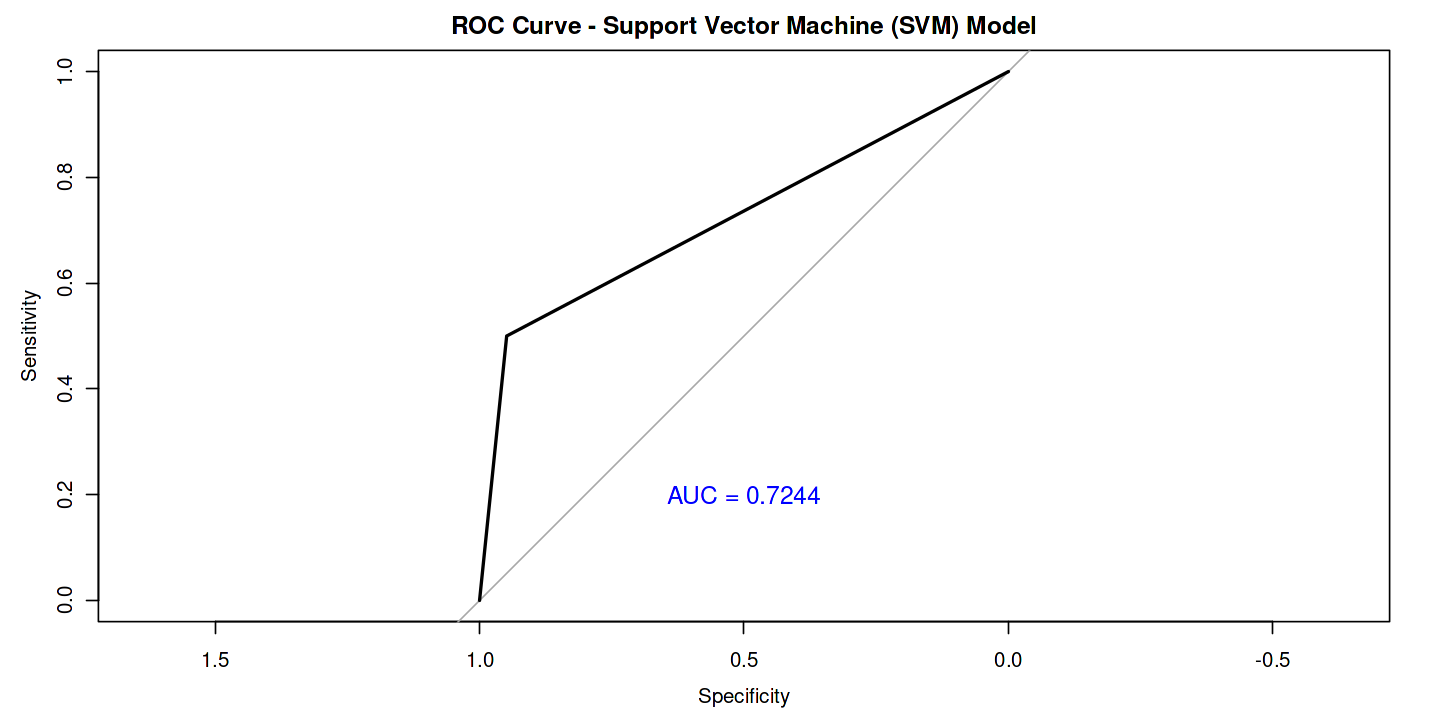

In [50]:
# ROC for Support Vector Machine (SVM) Model
# Generate the ROC curve
roc_svm <- roc(test_data$target, as.numeric(svm_pred), levels = c("No", "Yes"), direction = "<")

# Plot the ROC curve
plot(roc_svm, main = "ROC Curve - Support Vector Machine (SVM) Model")

# Calculate the AUC
auc_value <- auc(roc_svm)

# Add the AUC value to the plot
text(x = 0.5, y = 0.2, labels = paste("AUC =", round(auc_value, 4)), col = "blue", cex = 1.2)

In [51]:
# Calculate and Display Precision, Recall, F1-Score, and AUC
precision <- posPredValue(svm_pred, as.factor(test_data$target))
recall <- sensitivity(svm_pred, as.factor(test_data$target))
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Display Precision, Recall, F1-Score, and AUC")
cat("\nPrecision \t=", round(precision, 4))
cat("\nRecall \t\t=", round(recall, 4))
cat("\nF1-Score \t=", round(f1_score, 4))
cat("\nAUC \t\t=", round(auc_value, 4))

Display Precision, Recall, F1-Score, and AUC


Precision 	= 0.7872


Recall 		= 0.9487


F1-Score 	= 0.8605


AUC 		= 0.7244

### **4. Decision Tree Model**

In [52]:
# Evaluate the decision tree model using the testing data
confusionMatrix(dt_pred, as.factor(test_data$target))

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  33  10
       Yes  6  10
                                          
               Accuracy : 0.7288          
                 95% CI : (0.5973, 0.8364)
    No Information Rate : 0.661           
    P-Value [Acc > NIR] : 0.1681          
                                          
                  Kappa : 0.3639          
                                          
 Mcnemar's Test P-Value : 0.4533          
                                          
            Sensitivity : 0.8462          
            Specificity : 0.5000          
         Pos Pred Value : 0.7674          
         Neg Pred Value : 0.6250          
             Prevalence : 0.6610          
         Detection Rate : 0.5593          
   Detection Prevalence : 0.7288          
      Balanced Accuracy : 0.6731          
                                          
       'Positive' Class : No              
                                 

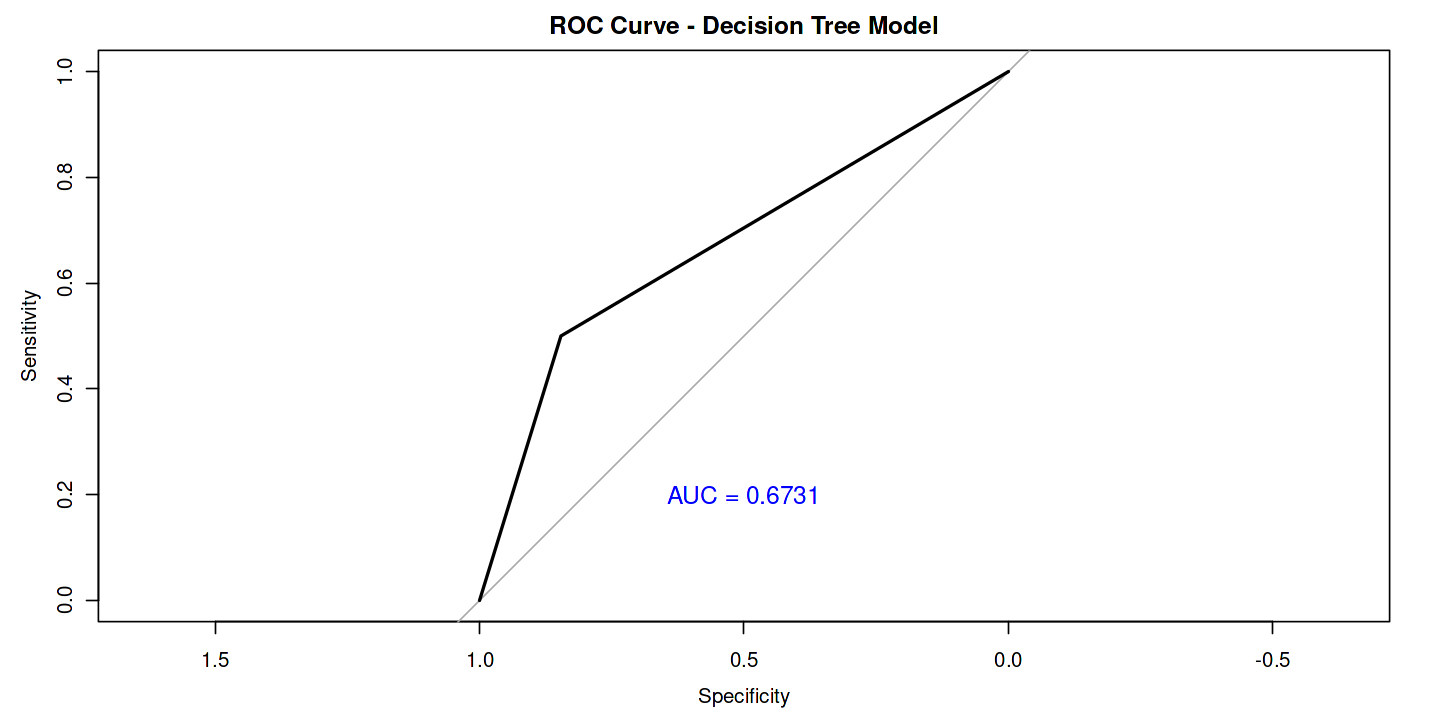

In [53]:
# ROC for Decision Tree Model
# Generate the ROC curve
roc_dt <- roc(test_data$target, as.numeric(dt_pred), levels = c("No", "Yes"), direction = "<")

# Plot the ROC curve
plot(roc_dt, main = "ROC Curve - Decision Tree Model")

# Calculate the AUC
auc_value <- auc(roc_dt)

# Add the AUC value to the plot
text(x = 0.5, y = 0.2, labels = paste("AUC =", round(auc_value, 4)), col = "blue", cex = 1.2)

In [54]:
# Calculate and Display Precision, Recall, F1-Score, and AUC
precision <- posPredValue(dt_pred, as.factor(test_data$target))
recall <- sensitivity(dt_pred, as.factor(test_data$target))
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Display Precision, Recall, F1-Score, and AUC")
cat("\nPrecision \t=", round(precision, 4))
cat("\nRecall \t\t=", round(recall, 4))
cat("\nF1-Score \t=", round(f1_score, 4))
cat("\nAUC \t\t=", round(auc_value, 4))

Display Precision, Recall, F1-Score, and AUC


Precision 	= 0.7674


Recall 		= 0.8462


F1-Score 	= 0.8049


AUC 		= 0.6731

### **5. k-Nearest Neighbor (KNN) Model**

In [55]:
# Evaluate the KNN model using the testing data
confusionMatrix(knn_pred, as.factor(test_data$target))

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  36  11
       Yes  3   9
                                          
               Accuracy : 0.7627          
                 95% CI : (0.6341, 0.8638)
    No Information Rate : 0.661           
    P-Value [Acc > NIR] : 0.06220         
                                          
                  Kappa : 0.4134          
                                          
 Mcnemar's Test P-Value : 0.06137         
                                          
            Sensitivity : 0.9231          
            Specificity : 0.4500          
         Pos Pred Value : 0.7660          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6610          
         Detection Rate : 0.6102          
   Detection Prevalence : 0.7966          
      Balanced Accuracy : 0.6865          
                                          
       'Positive' Class : No              
                                 

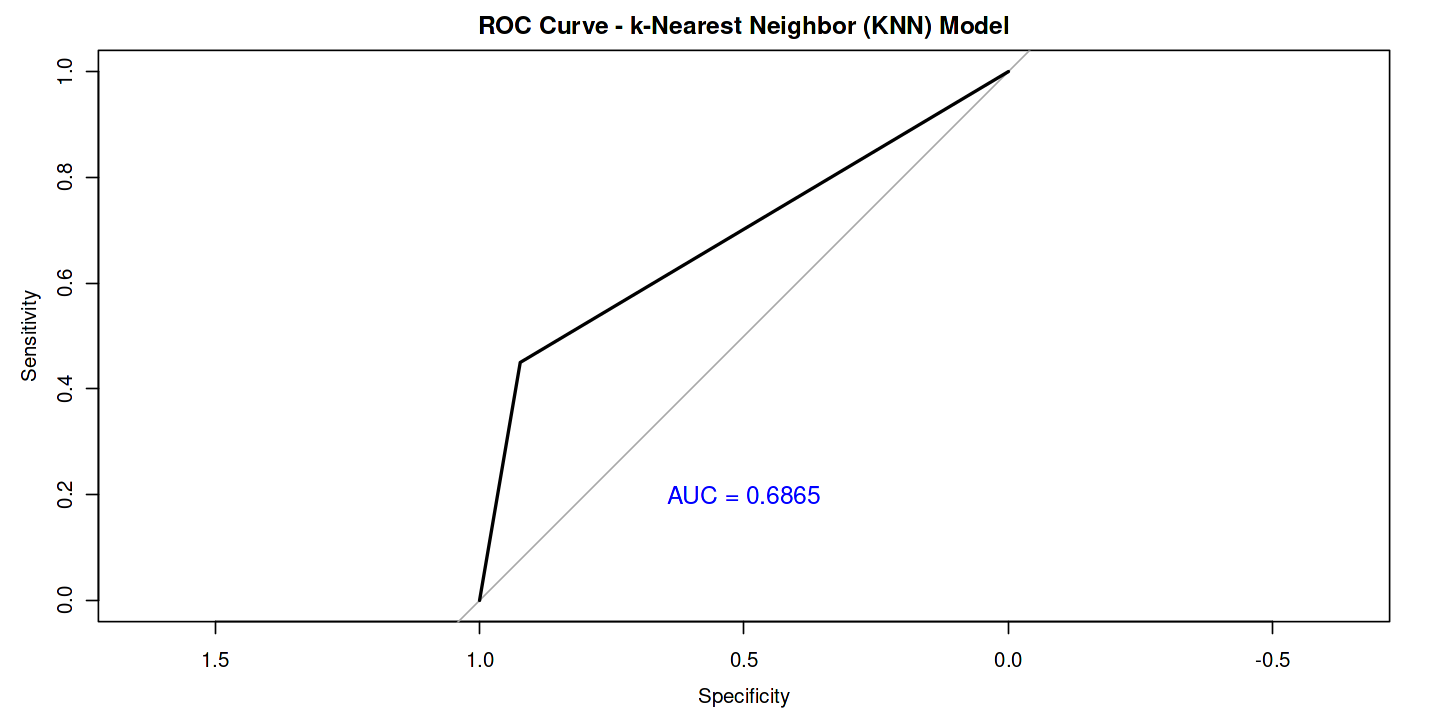

In [56]:
# ROC for k-Nearest Neighbor (KNN) Model
# Generate the ROC curve
roc_knn <- roc(test_data$target, as.numeric(knn_pred), levels = c("No", "Yes"), direction = "<")

# Plot the ROC curve
plot(roc_knn, main = "ROC Curve - k-Nearest Neighbor (KNN) Model")

# Calculate the AUC
auc_value <- auc(roc_knn)

# Add the AUC value to the plot
text(x = 0.5, y = 0.2, labels = paste("AUC =", round(auc_value, 4)), col = "blue", cex = 1.2)

In [57]:
# Calculate and Display Precision, Recall, F1-Score, and AUC
precision <- posPredValue(knn_pred, as.factor(test_data$target))
recall <- sensitivity(knn_pred, as.factor(test_data$target))
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Display Precision, Recall, F1-Score, and AUC")
cat("\nPrecision \t=", round(precision, 4))
cat("\nRecall \t\t=", round(recall, 4))
cat("\nF1-Score \t=", round(f1_score, 4))
cat("\nAUC \t\t=", round(auc_value, 4))

Display Precision, Recall, F1-Score, and AUC


Precision 	= 0.766


Recall 		= 0.9231


F1-Score 	= 0.8372


AUC 		= 0.6865

### **6. Naive Bayesian Model**

In [58]:
# Evaluate the naive bayesian model using the testing data
confusionMatrix(nb_pred, as.factor(test_data$target))

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  35   8
       Yes  4  12
                                          
               Accuracy : 0.7966          
                 95% CI : (0.6717, 0.8902)
    No Information Rate : 0.661           
    P-Value [Acc > NIR] : 0.01668         
                                          
                  Kappa : 0.5229          
                                          
 Mcnemar's Test P-Value : 0.38648         
                                          
            Sensitivity : 0.8974          
            Specificity : 0.6000          
         Pos Pred Value : 0.8140          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6610          
         Detection Rate : 0.5932          
   Detection Prevalence : 0.7288          
      Balanced Accuracy : 0.7487          
                                          
       'Positive' Class : No              
                                 

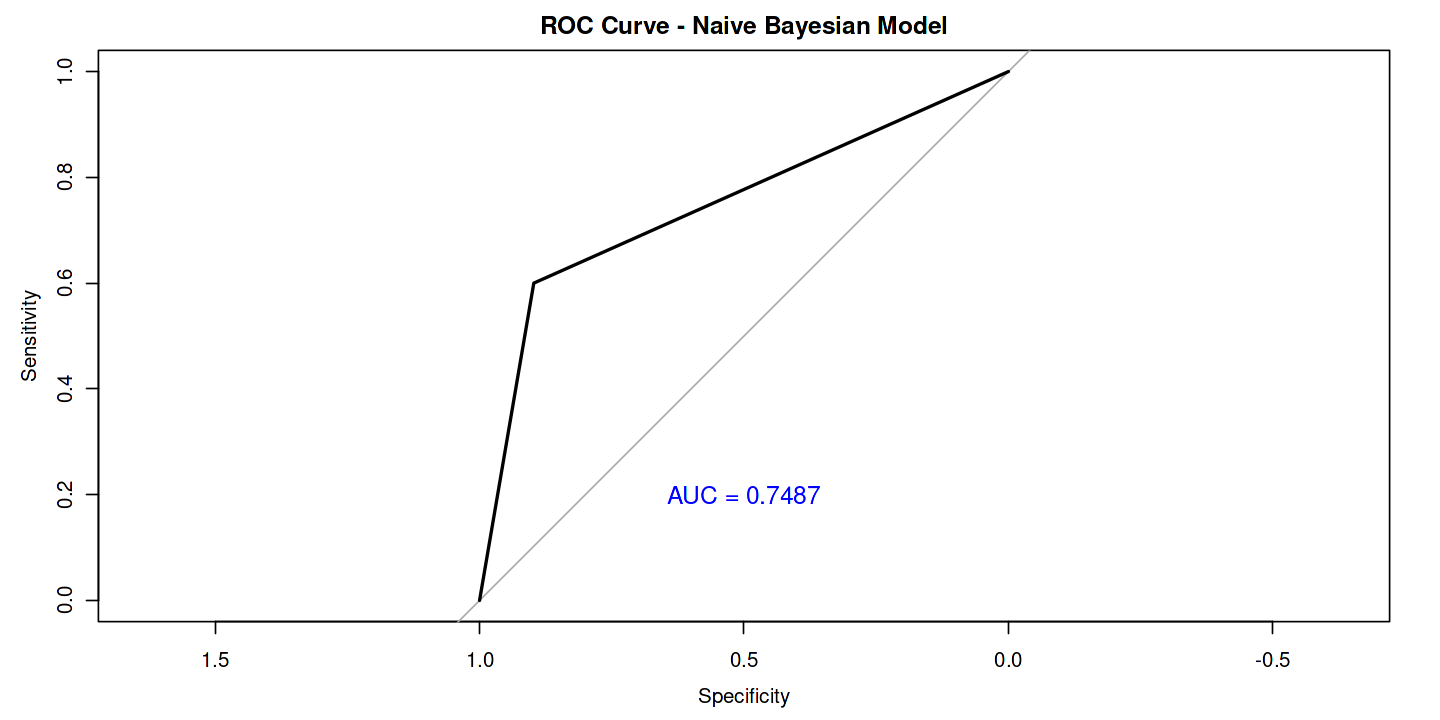

In [59]:
# ROC for Naive Bayesian Model
# Generate the ROC curve
roc_nb <- roc(test_data$target, as.numeric(nb_pred), levels = c("No", "Yes"), direction = "<")

# Plot the ROC curve
plot(roc_nb, main = "ROC Curve - Naive Bayesian Model")

# Calculate the AUC
auc_value <- auc(roc_nb)

# Add the AUC value to the plot
text(x = 0.5, y = 0.2, labels = paste("AUC =", round(auc_value, 4)), col = "blue", cex = 1.2)

In [60]:
# Calculate and Display Precision, Recall, F1-Score, and AUC
precision <- posPredValue(nb_pred, as.factor(test_data$target))
recall <- sensitivity(nb_pred, as.factor(test_data$target))
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Display Precision, Recall, F1-Score, and AUC")
cat("\nPrecision \t=", round(precision, 4))
cat("\nRecall \t\t=", round(recall, 4))
cat("\nF1-Score \t=", round(f1_score, 4))
cat("\nAUC \t\t=", round(auc_value, 4))

Display Precision, Recall, F1-Score, and AUC


Precision 	= 0.814


Recall 		= 0.8974


F1-Score 	= 0.8537


AUC 		= 0.7487

## **Model Deployment**

In [61]:
# Save the best model based on the evaluations above.
###saveRDS(log_model, file = "Heart.df_log_model.rds")

In [62]:
# To load the model for future use
###loaded_model <- readRDS("Heart.df_log_model.rds")

## **Conclusion**
In this project, multiple classification models were evaluated to identify the most effective model for deployment, with a primary emphasis on minimizing false negatives. Sensitivity (recall) was prioritized as the key metric, as it reflects the model's ability to accurately identify positive cases, thereby reducing false negatives. Additional metrics such as precision, F1-score, and AUC were incorporated to ensure a comprehensive evaluation of model robustness and overall performance.

Among the models assessed, the Support Vector Machine (SVM) achieved the highest sensitivity (0.9487), demonstrating superior capability in minimizing false negatives. However, its relatively low AUC (0.7244) indicated weaker overall class separation compared to other models. In contrast, the Logistic Regression model exhibited an optimal balance between sensitivity (0.9231) and overall classification performance, attaining the highest AUC (0.8436) and a commendable F1-score of 0.8571. This equilibrium suggests that Logistic Regression effectively reduces false negatives while maintaining high precision and reliable class separation.

Based on these findings, the Logistic Regression model was selected for deployment. Its strong combination of minimizing false negatives, reliable classification accuracy, and balanced overall performance aligns well with the project’s objectives. This model provides actionable insights and dependable predictions, ensuring optimal results for the intended application.

By leveraging machine learning models such as Logistic Regression, Random Forest, SVM, Decision Trees, k-Nearest Neighbor (KNN), and Naive Bayesian, an insurance company can predict the likelihood of heart disease in applicants. This capability enhances risk management and supports more accurate pricing of insurance policies. Employing rigorous model evaluation techniques allows the company to select and deploy the most effective model, ensuring future predictions are both reliable and actionable.
